## Import Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%run /content/drive/MyDrive/churn/Packages.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 325 kB 5.2 MB/s 
     |████████████████████████████████| 102 kB 45.9 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 690 kB 50.7 MB/s 
     |████████████████████████████████| 9.9 MB 54.9 MB/s 
     |████████████████████████████████| 4.7 MB 31.1 MB/s 
     |████████████████████████████████| 296 kB 45.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=0cbdebdc9801cdde7c893cb5cba49d6cf421550b9949d4b011961180f3ecb080
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found e

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


## Reading dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/churn/telco_churn.csv')
df = df.drop('Unnamed: 0', axis =1)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [4]:
x = df.drop('Churn', axis =1)
x.dtypes

SeniorCitizen                                int64
MonthlyCharges                             float64
TotalCharges                                 int64
gender_Female                                int64
gender_Male                                  int64
Partner_No                                   int64
Partner_Yes                                  int64
Dependents_No                                int64
Dependents_Yes                               int64
PhoneService_No                              int64
PhoneService_Yes                             int64
MultipleLines_No                             int64
MultipleLines_No phone service               int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_No internet service           int64
OnlineSecurity_Yes             

In [5]:
y = df['Churn']
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

## Train Test Split 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

# Decision Tree Classifier

### Standard model

What could we expect from this model ? If we want to maximize the precision of the model, we should optimize the number of tree branches, that means not specify the 'max_depth' parameter. If we want to maximize recall, we do not need to go as deeper in the tree as we should do for a precision maximization.
That means, lets try with max_depth = 3 for ploting a simple tree. 

In [8]:
model_dt = DecisionTreeClassifier(criterion = 'gini', random_state= 100, max_depth=3, min_samples_leaf=8)

In [9]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, random_state=100)

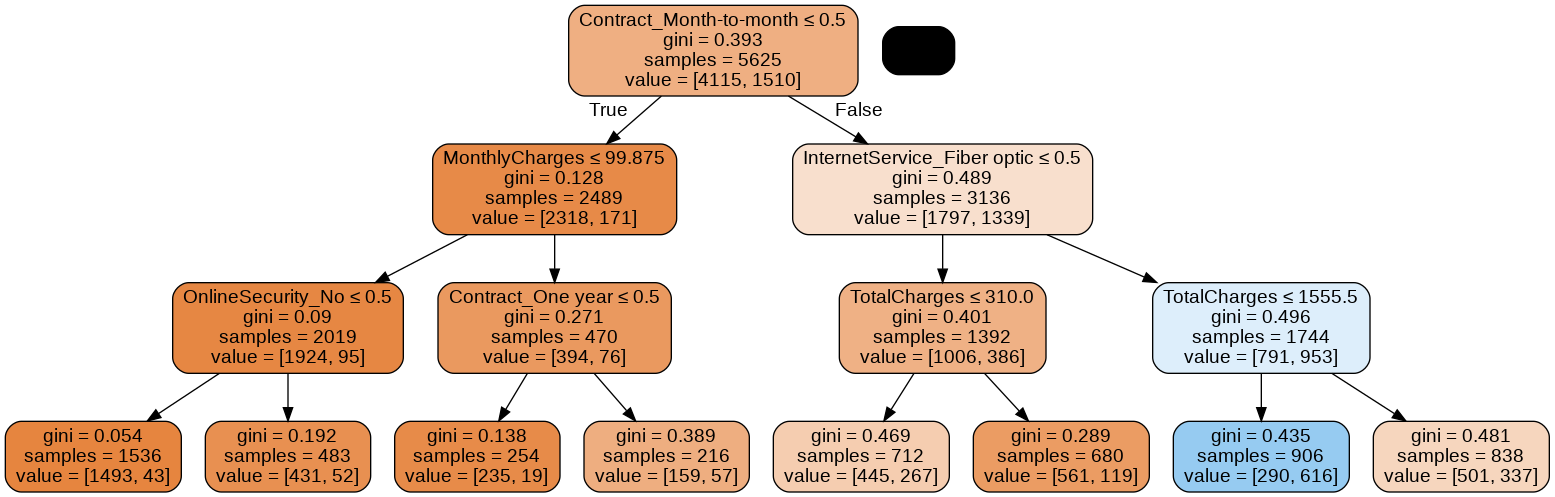

In [10]:
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
feature_cols = x.columns
dot_data = StringIO()
export_graphviz(model_dt, out_file = dot_data,
                filled=True,rounded=True,
                special_characters=True, feature_names=feature_cols)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Reading : **Root** and **decision nodes** (the higher stairs) contain questions which split into **subnodes**. The **leaf nodes** (the lowest one) are nodes that don't split into more nodes but are the ones where classes are assigned by majority vote. 
We read this Tree from the root node to the leaf node. 


---


Starting at the root node, we first ask "Is the contrat is Month-by-month"? (Since the variable is 0 or 1, 0.5 make the threshold). 
If it's true, so we're step down to the value of Monthly Charges, True at right and False at left. 
Value is a vector that indicates the well classify raws (first element) and the wrong one (second coordinate) 


---


Without max_depth, classification trees are a greedy algorithm which means by default it will continue to split until it has a **pure node**. Without max_depth, this often leads to overfitting on the training dataset. 

Decision trees split on the feature and correspondning split point that results in the largest **information gain** (IG) for a given criterion (here, gini).
IG = Information before splitting - information after splitting.  

If we look at the upper two stages, we have :

In [11]:
# Gini for parent
print(1 - ((4124/(4124+1501))**2+(1501/(4124+1501))**2))
# Gini for child node (left)
print(1 - ((2336/(2336+171))**2+(171/(2336+171))**2))
# Gini for child node (right)
print(1 - ((1788/(1788+1330))**2+(1330/(1788+1330))**2))
# Information gain 
print(0.391- 0.127*(2507/5625)-0.489*(3118/5625))

0.3912769738271604
0.1271130901286528
0.48921180622271887
0.06333937777777776


In [12]:
feat_importance = model_dt.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, model_dt.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict,orient='index')
feat_imp.rename(columns={0:'FeatureImportance'},inplace=True)
feat_imp.sort_values(by=['FeatureImportance'],ascending=False).head(8)

,FeatureImportance
Contract_Month-to-month,0.607473
InternetService_Fiber optic,0.191250
TotalCharges,0.161998
MonthlyCharges,0.017091
Contract_One year,0.014234
OnlineSecurity_No,0.007954
SeniorCitizen,0.000000
Contract_Two year,0.000000


As we can see, with max_depth = 3, only 6 variables have a significant importance inside the model. 

We finally look at the metrics of interest, here they are precision (for qualitative need) and recall (for a quantitative need).

In [13]:
y_pred = model_dt.predict(x_test)
report = metrics.classification_report(y_test, y_pred, output_dict=True)
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
print('precision : {}'.format(precision))
print('recall : {}'.format(recall))

precision : 0.7427338352926918
recall : 0.6703456909566438


In [14]:
print(metrics.confusion_matrix(y_test,y_pred))

[[973  75]
 [211 148]]


min_samples_leaf and max_depth are parameters used to prevent a tree from overfiting. Cost complexity pruning (ccp) provides another option to control the size of a tree. What why ccp will be used next. 

### Tune the Depth of a Tree

In [15]:
max_depth_range = list(range(1,10))
precisions = []
recalls = []
for depth in max_depth_range:
  clf = DecisionTreeClassifier(max_depth=depth, random_state=100)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  report = metrics.classification_report(y_test, y_pred, output_dict=True)
  precision = report['macro avg']['precision']
  recall = report['macro avg']['recall']
  precisions.append(precision)
  recalls.append(recall)
print(precisions)
print(recalls)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.3724235963041933, 0.6988216336754643, 0.7427338352926918, 0.742184890490051, 0.7326280722534795, 0.7355799430957395, 0.7215324298459544, 0.7163130116329168, 0.7088970170207335]
[0.5, 0.7075939845627166, 0.6703456909566438, 0.7158442131450806, 0.708803344744732, 0.7033479342533331, 0.6907360352123157, 0.713511875651194, 0.6914204533373025]


The precision looks to be at its peak for max_depth = 4. And it's for max_depth = 2 that the recall is at its peak. 

### Cost Complexity pruning
[Pruning technique](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.
We are looking for a precision optimization model.

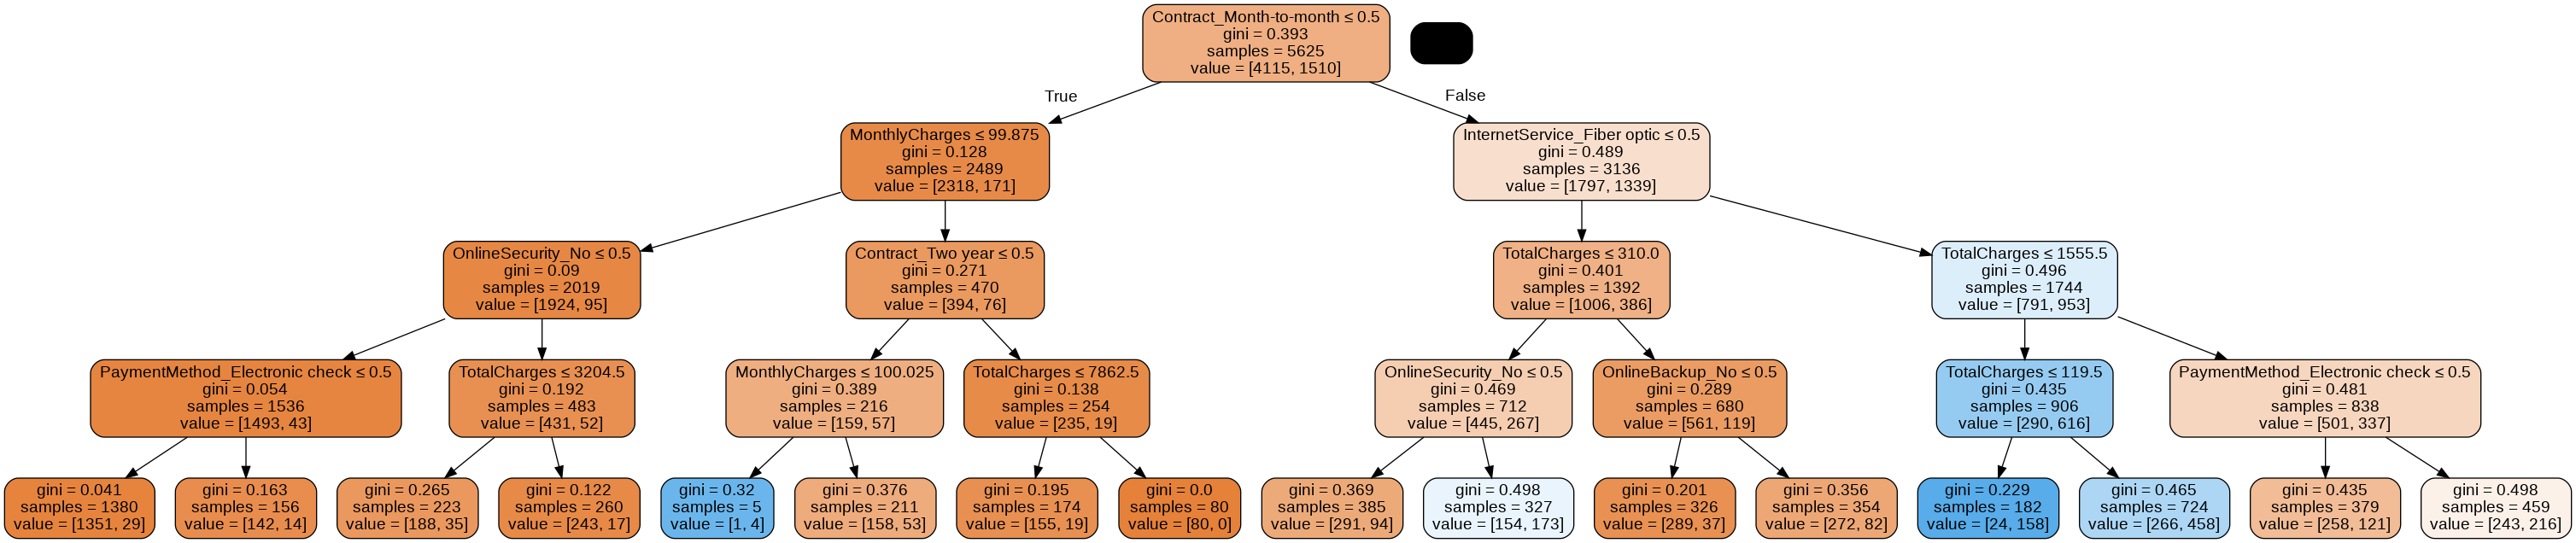

In [16]:
from six import StringIO
from IPython.display import Image
model_prune = DecisionTreeClassifier(criterion = 'gini', random_state= 100,max_depth =4)
model_prune.fit(x_train, y_train)
feature_cols = x.columns
dot_data = StringIO()
export_graphviz(model_prune, out_file = dot_data,
                filled=True,rounded=True,
                special_characters=True, feature_names=feature_cols)
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [17]:
feat_importance = model_prune.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, model_prune.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict,orient='index')
feat_imp.rename(columns={0:'FeatureImportance'},inplace=True)
feat_imp.sort_values(by=['FeatureImportance'],ascending=False).head(12)

,FeatureImportance
Contract_Month-to-month,0.545459
TotalCharges,0.175252
InternetService_Fiber optic,0.171726
OnlineSecurity_No,0.051091
MonthlyCharges,0.019851
PaymentMethod_Electronic check,0.016585
Contract_Two year,0.012781
OnlineBackup_No,0.007254
SeniorCitizen,0.000000
StreamingTV_No internet service,0.000000


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

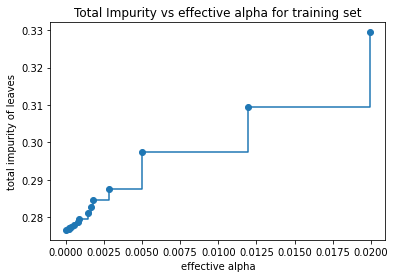

In [18]:
path = model_prune.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Minimal ccp finds the node with the "weakest link". The weakest link is characterized by an effective akpha, where the nodes with the smallest effective alpha, where the nodes with the smallest effective alpha are pruned first. to get an idea of what values of ccp_alpha could be appropriate, sklearn provides the above function that returns the effective alphas and the corresponding total leaf impurities at each step of pruning process. As alpha increases, more of the tree is pruned, which increases the total impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves. 

In [19]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state= 0, max_depth = 4,
                               ccp_alpha=ccp_alpha)
  clf.fit(x_train, y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha : {}".format(
    clfs[-1].tree_.node_count,ccp_alphas[-1])
)

Number of nodes in the last tree is: 1 with ccp_alpha : 0.06333128467377908


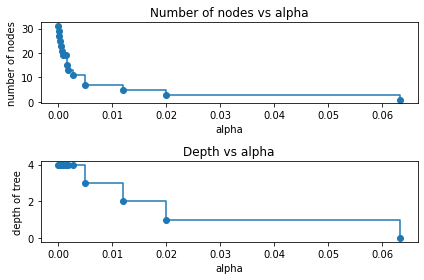

In [20]:
#clfs = clfs[:-1]
#cp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2,1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Here above we show that the number of nodes and tree depth decreases as alpha increases

In [21]:
y_preds = [clf.predict(x_test) for clf in clfs]
reports = [metrics.classification_report(y_test, y_pred, output_dict=True,zero_division=1) for y_pred in y_preds]
precisions = []
precision = [report['macro avg']['precision'] for report in reports]
precisions.append(precision)
print(precisions)

[[0.742184890490051, 0.742184890490051, 0.742184890490051, 0.742184890490051, 0.744423301669114, 0.744423301669114, 0.744423301669114, 0.744423301669114, 0.744423301669114, 0.744423301669114, 0.744423301669114, 0.7427338352926918, 0.6988216336754643, 0.8724235963041933, 0.8724235963041933]]


It's looks like pruning the tree depth doesn't improve the model. The problem might be the imbalanced dataset we are facing, to handle it, we could look for upsampling method.

### Using an upSampling method, with SMOTEEN 

In [22]:
model_dt_smote = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=4, min_samples_leaf=8)

In [23]:
model_dt_smote.fit(xr_train, yr_train)
yr_predict = model_dt_smote.predict(xr_test)

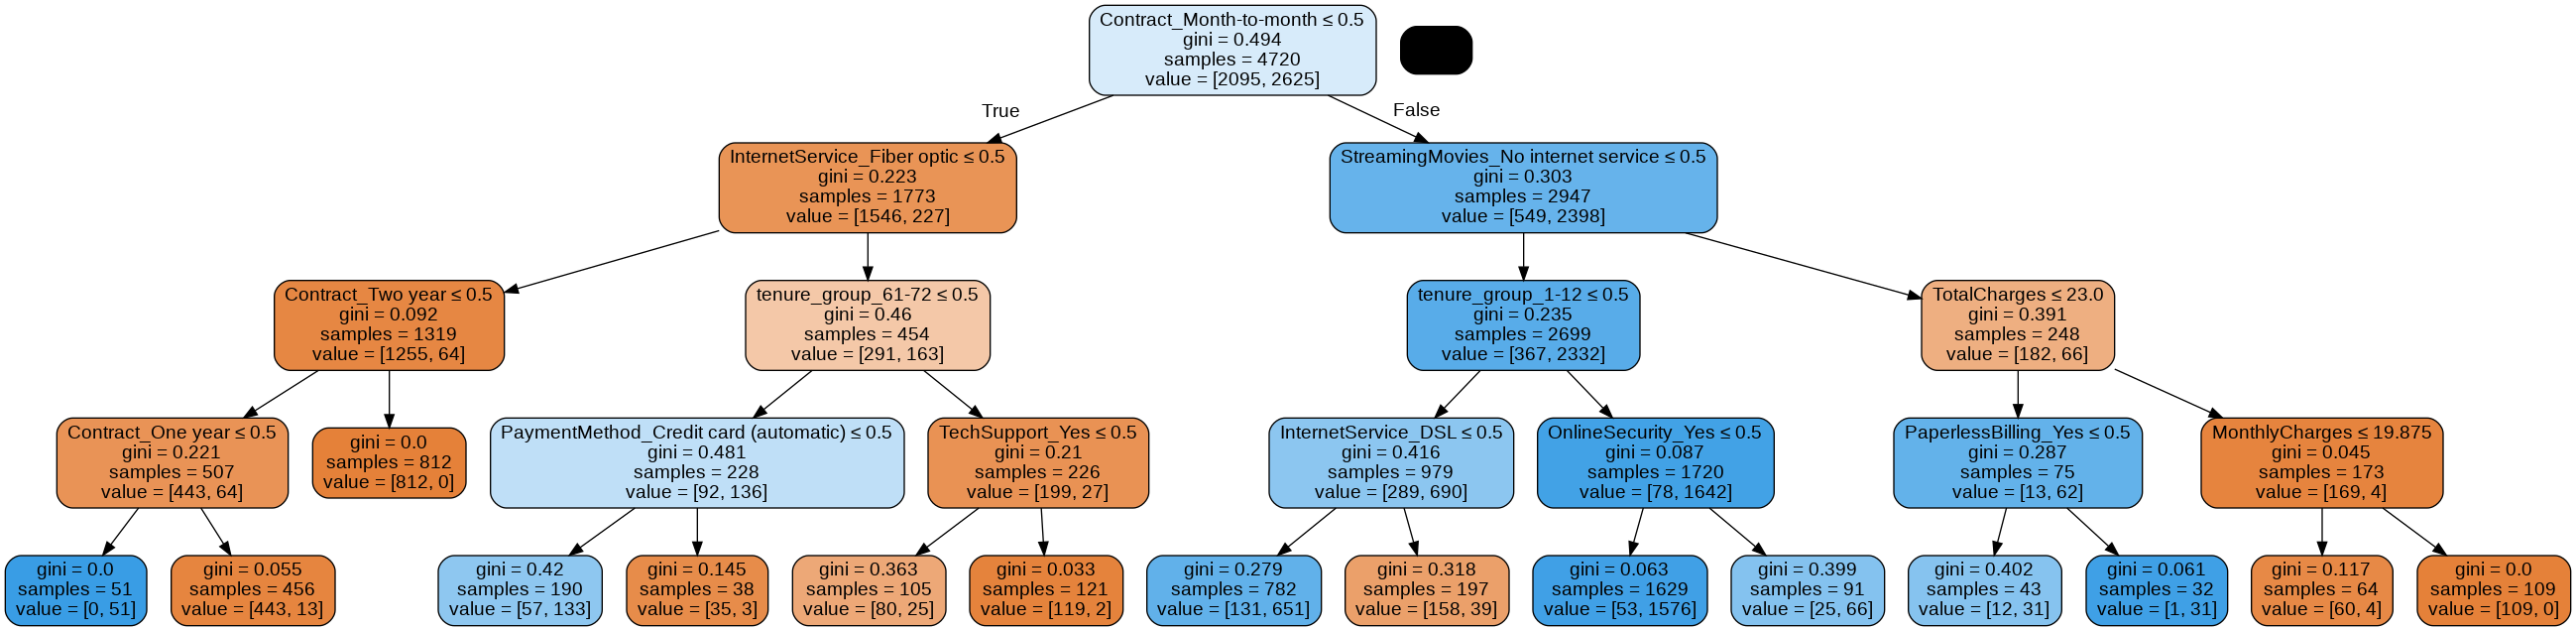

In [24]:
feature_cols = x.columns
dot_data = StringIO()
export_graphviz(model_dt_smote, out_file = dot_data,
                filled=True,rounded=True,
                special_characters=True, feature_names=feature_cols)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [25]:
feat_importance_smote = model_dt_smote.tree_.compute_feature_importances(normalize=False)
feat_imp_dict_smote = dict(zip(feature_cols, model_dt_smote.feature_importances_))
feat_imp_smote = pd.DataFrame.from_dict(feat_imp_dict_smote,orient='index')
feat_imp_smote.rename(columns={0:'FeatureImportance'},inplace=True)
feat_imp_smote.sort_values(by=['FeatureImportance'],ascending=False).head(12)

,FeatureImportance
Contract_Month-to-month,0.601198
StreamingMovies_No internet service,0.093790
InternetService_DSL,0.073181
Contract_One year,0.050008
tenure_group_1-12,0.044988
TotalCharges,0.039022
InternetService_Fiber optic,0.037616
tenure_group_61-72,0.029833
PaymentMethod_Credit card (automatic),0.014109
OnlineSecurity_Yes,0.005840


In [26]:
report_smote = metrics.classification_report(yr_test,yr_predict, output_dict=True,zero_division=1)
precision_smote = report_smote['macro avg']['precision']
recall_smote = report_smote['macro avg']['recall']
print('precision : {}'.format(precision_smote))
print('recall : {}'.format(recall_smote))

precision : 0.9249186160950866
recall : 0.919946762589928


In [27]:
print(metrics.confusion_matrix(yr_test,yr_predict))

[[491  65]
 [ 27 598]]


Adding Upsampling into the model, precision (quality measure) and recall (quantitative measure) are much better compared to standard model.

# Random Forest Classifier

As I done it for DecisionTree, I could try to optimize the depth and others parameters, but we have seen that improving the model is about upsampling the training data. 

### Standard

In [28]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=100, max_depth=6, min_samples_leaf=8)

In [29]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [30]:
y_pred_rf=model_rf.predict(x_test)

In [31]:
report_rf = metrics.classification_report(y_test,y_pred_rf, output_dict=True,zero_division=1)
precision_rf = report_rf['macro avg']['precision']
recall_rf = report_rf['macro avg']['recall']
print('precision : {}'.format(precision_rf))
print('recall : {}'.format(recall_rf))

precision : 0.7712474211241382
recall : 0.7005863403431924


In [32]:
print(metrics.confusion_matrix(y_test,y_pred_rf))

[[978  70]
 [191 168]]


The insights give by the standard Decision tree are the same here above, precision is too low as recall is.
Let's look how upsampling could help

### With upsampling

In [33]:
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=100, max_depth=6, min_samples_leaf=8)

In [34]:
model_rf_smote.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [35]:
yr_predict1 = model_rf_smote.predict(xr_test)
report_rf_smote = classification_report(yr_test,yr_predict1,output_dict=True,zero_division=1)
precision_rf_smote = report_rf_smote['macro avg']['precision']
recall_rf_smote = report_rf_smote['macro avg']['recall']
print('precision : {}'.format(precision_rf_smote))
print('recall : {}'.format(recall_rf_smote))

precision : 0.9360914228800408
recall : 0.9334359712230216


Using RF Classifier, we are able to match DT classifier, even roughly better looking at the precision.

##KNN Classifier

In kNN Classification, the output is a classe membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. If k=1, then the object is simply assigned to the class of that single nearest neighbor. 

### Standard

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
def confusion_matrix_plot(y_test, y_pred):
    plt.matshow(confusion_matrix(y_test, y_pred))
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=None)
    plt.show()

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
precision : 0.706452448820938
recall : 0.6694061111229241
[[936 112]
 [199 160]]


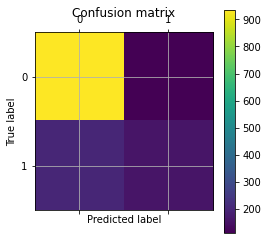

None


In [38]:
model_knn = KNeighborsClassifier(n_jobs=-1)
model_knn.fit(x_train,y_train)
print(model_knn.get_params())
y_pred_knn = model_knn.predict(x_test)
report_knn = classification_report(y_test,y_pred_knn,output_dict=True,zero_division=1)
precision_knn = report_knn['macro avg']['precision']
recall_knn = report_knn['macro avg']['recall']
print('precision : {}'.format(precision_knn))
print('recall : {}'.format(recall_knn))
print(metrics.confusion_matrix(y_test,y_pred_knn))
print(confusion_matrix_plot(y_test,y_pred_knn))

### Upsampling for KNN

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
precision : 0.9614448005329841
recall : 0.9624115107913669
[[540  16]
 [ 29 596]]


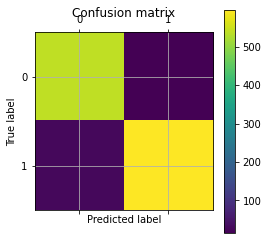

None


In [39]:
model_knn_smote = KNeighborsClassifier(n_jobs=-1)
model_knn_smote.fit(xr_train,yr_train)
print(model_knn.get_params())
y_pred_knn_smote = model_knn_smote.predict(xr_test)
report_knn_smote = classification_report(yr_test,y_pred_knn_smote,output_dict=True,zero_division=1)
precision_knn_smote = report_knn_smote['macro avg']['precision']
recall_knn_smote = report_knn_smote['macro avg']['recall']
print('precision : {}'.format(precision_knn_smote))
print('recall : {}'.format(recall_knn_smote))
print(metrics.confusion_matrix(yr_test,y_pred_knn_smote))
print(confusion_matrix_plot(yr_test,y_pred_knn_smote))

## Ensemble method : Stacking Classifier

[Leo Breiman' stacking](https://link.springer.com/article/10.1007/bf00117832) is an ensemble method that, empirically, has always gives better results than each individual model. As Breiman build it, the final estimator is Rigde regression applied with cross validation. Indeed, such set-up avoid high correlations between each model and over-fitting on data. 

[References of sklearn' stacking is Wolpert, 1992, Breiman own references](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)

In [40]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ("dt", model_dt_smote),
    ("knn", model_knn_smote),
    ("rf", model_rf_smote),
    ]

stacking_model = StackingClassifier(
    estimators,
    final_estimator=None, 
    cv = None,
)
stacking_model.fit(xr_train,yr_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=4,
                                                       min_samples_leaf=8,
                                                       random_state=100)),
                               ('knn', KNeighborsClassifier(n_jobs=-1)),
                               ('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_leaf=8,
                                                       random_state=100))])

precision : 0.9699790253993794
recall : 0.9707093525179856
[[543  13]
 [ 22 603]]


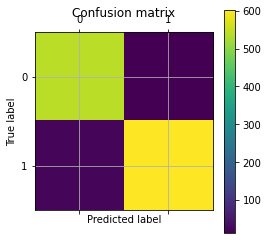

None


In [41]:
y_pred_stacking = stacking_model.predict(xr_test)
report_stacking = classification_report(yr_test,y_pred_stacking,output_dict=True,zero_division=1)
precision_stacking = report_stacking['macro avg']['precision']
recall_stacking = report_stacking['macro avg']['recall']
print('precision : {}'.format(precision_stacking))
print('recall : {}'.format(recall_stacking))
print(metrics.confusion_matrix(yr_test,y_pred_stacking))
print(confusion_matrix_plot(yr_test,y_pred_stacking))

## Conclusion

In [42]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest','kNN','Stacking'],
    'Precision': [precision_smote, precision_rf_smote,precision_knn_smote,precision_stacking],
    'Recall': [recall_smote, recall_rf_smote,recall_knn_smote,recall_stacking]})
models

,Model,Precision,Recall
0,Decision Tree,0.924919,0.919947
1,Random Forest,0.936091,0.933436
2,kNN,0.961445,0.962412
3,Stacking,0.969979,0.970709


And here, in facts, Recall and Precision are the highest ones using Stacking Classifier. 

A lot of topics are still not treated by theses works. We do not take into account 

## Introduce to lift curve

The LIFT curve is typically how much better the model performs on the top x% (for x small) of the base. From it, we will see that we have y times more true positive than false positive in the top x%, hence a lift of y. 

In [43]:
def plot_lift_curve(y_test, y_pred, step=0.01):
  #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_test
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

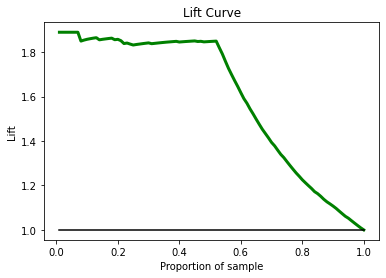

In [44]:
plot_lift_curve(yr_test,y_pred_stacking,0.01)

Here the highest lift equal roughly 1.8 means that for the first 10% of your “most potential churner" you will reach 1.8 more churner than if you were observe random customers.

## Save the models

In [44]:
import pickle
import datetime

def save_model(model,method):
  """Save tf/Keras model.

  Model file is named model + timestamp.

  Parameters
  ----------
  model (tf/Keras model): model to be saved
  basename: location to save model file
  """
  pickle.dump(model,open('model_{}.sav'.format(method),'wb'))
  return

In [45]:
save_model(model_dt_smote,"dt")
save_model(model_rf_smote,"rf")
save_model(model_knn_smote,"knn")
save_model(stacking_model,"Stacking")